In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset 

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = dataset.iloc[:, 1:-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [5]:
y = dataset.iloc[:,-1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [7]:
# fitting the SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', gamma='auto')
regressor.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [8]:
# predicting the new result
y_pred = regressor.predict(np.array([6.5]).reshape(1, -1))
y_pred

array([130001.55760156])

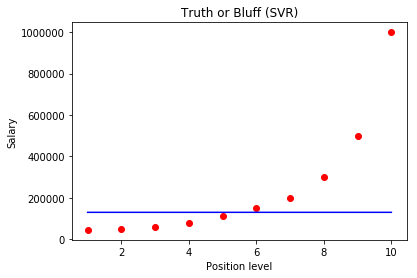

In [9]:
# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## What happened there?

__fo most machine learning models we don't need to apply feature scaling because the libraries or other classes include feautre scaling in their algorithms  
But here we are using a less common class the SVR class and this class doesn't seem to apply feature scaling to its algorithm__

In [11]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))

c:\users\divya\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\divya\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
# fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', gamma='auto')
regressor.fit(X,y)

c:\users\divya\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

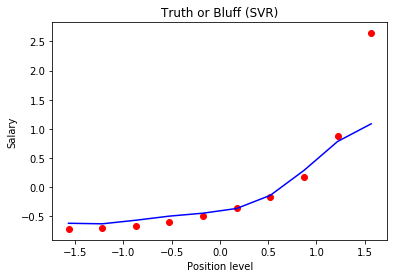

In [14]:
# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### SVR is fitting much better now after feature scaling 
***

__But anyway the point here is that as we are now feeling much better the data set since the blue curve
is getting very close to all the real observation points.
But actually there is an exception.
There is this exception for this real observation point here that corresponds to the CEO that I remember
has a one million dollar annual salary and has a 10 level here.
And can you figure out why as we are doing this.
Well the reason for that I mean the reason for the fact that this as we Almelo is not fitting to this real observation point corresponding to the CEO Well it's because the CEO is considered as an outlier here.
Sorry for the CEO but that's what's happening in there as your model here is having some penalty parameters selected by default in its algorithm.
And therefore since the CEO observation point is quite far from the other data points.
Well the as your a model consider this observation point is an outlier and made its fit on these observation points.
That's why we get this very well fitted model for all these observation points but not for this here
But that's actually okay for us because what we are interested in is to protect the salary of this 6.5 level that is about here because this corresponds to previous level of this employee we're negotiating with right now.__
***

So it's all fine and we can actually move on to the next step prediction step to actually see what this

as we are our model was predicting for 6.5 salary of our future potential employee.

So let's do this without waiting.

We would love to directly select this and execute this but unfortunately we have to do something here

and this little something that we have to do is of course related to the fact that we applied feature

scaling to our data X and Y and therefore our regressor here is fitted to X and y that were

transformed.

So since 6.5 is in some way not transformed we actually need to transform it.

And that's what we're going to do right now.

So basically it's very simple what we're going to do is to apply this sc_X object that is the object

used to scale the features.

Well we're going to apply that object to 6.5 so that it can be suited to the regressor.


In [16]:
# predicting a new result 
y_pred_2 = regressor.predict(sc_X.transform(np.array([6.5]).reshape(1, -1)))
y_pred_2

array([0.01158103])

*** 
we are getting the scaled salary, in order to get the original salary we have to apply the inverse_transform method on sc_y object
***

In [18]:
y_pred_3 = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
y_pred_3

array([252789.13921624])